# Week 3 – Image Encodings & HOG

## Objective
Understand **hand-crafted image encodings** and how Histogram of Oriented Gradients (HOG)
represents visual structure in images.

**Instructions**
- Read the markdown carefully
- Fill in cells marked with `TODO`
- Do NOT change cell order


In [6]:
# TODO: Import required libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog


## Step 1: Load Vehicle Damage Dataset
We use a **small curated subset** of the vehicle damage dataset provided by mentors. If by chance this part is confusing to you, because we haven't explicitly covered it, please ask for help.

In [17]:
# TODO: Load a few vehicle damage images from the dataset folder
# Convert images to grayscale
# Resize images to a fixed size (e.g., 128x128)
import json
import random

with open("annotations.json", "r") as f:
    data = json.load(f)

print(len(data))          # total images

random.seed(42)
imgKeys = list(data.keys())
randomSample =  random.sample(imgKeys,600)
subset_data = {k: data[k] for k in randomSample}

IMG_SIZE = 128

def load_nd_preprocess(img_path):
    img = cv2.imread(img_path) 
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    resized_img = cv2.resize(gray_img, (IMG_SIZE, IMG_SIZE)) 
    return resized_img


X = []

for img_name in subset_data.keys():
    path = os.path.join("archive/image/image/", img_name)
    img = load_nd_preprocess(path)
    X.append(img)

X = np.array(X)  



11621


## Step 2: Compute HOG Features
HOG captures gradient orientation information in localized regions.


In [25]:
# TODO: Compute HOG features and HOG visualizations
# Hint: hog(image, visualize=True)
from skimage import exposure

hog_features = []
hog_images = []

for i in range(len(X)):
    image = X[i]   

    features, hog_img = hog(
        image,
        visualize=True,
    )

    hog_features.append(features)
    hog_images.append(hog_img)


## Step 3: Visualize HOG Representation
Compare the original image with its HOG visualization.


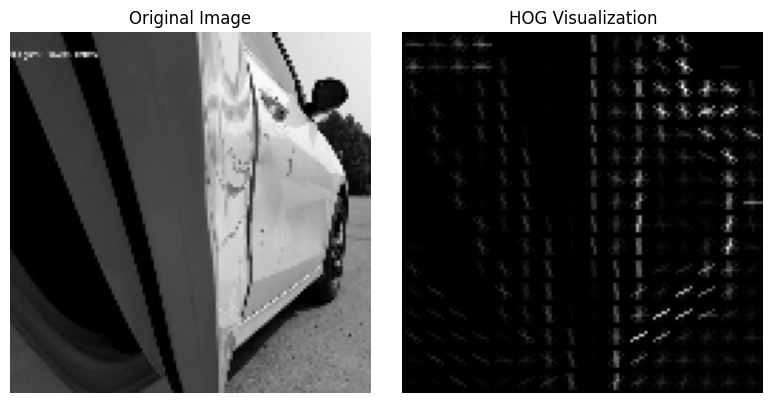

In [35]:
# TODO: Plot original image and corresponding HOG image
import matplotlib.pyplot as plt


image = X[0]          # original image
_, hog_img = hog(
        image,visualize=True
    )
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# HOG visualization
plt.subplot(1, 2, 2)
plt.imshow(hog_img, cmap="gray")
plt.title("HOG Visualization")
plt.axis("off")

plt.tight_layout()
plt.show()


## Step 4: Dimensionality Reduction
Apply PCA or t-SNE to HOG feature vectors to visualize structure.


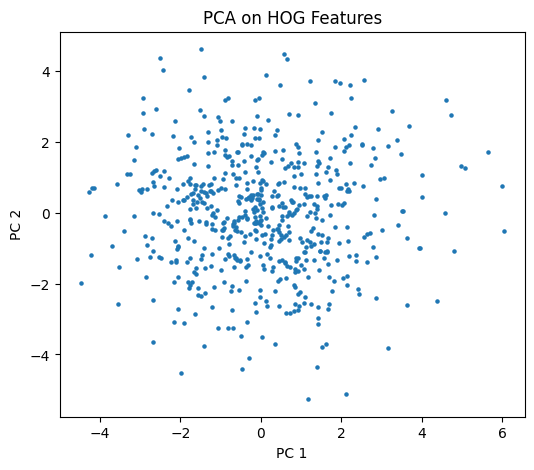

In [37]:
# TODO: Apply PCA or t-SNE to HOG features
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

# First reduce dimensionality
pca = PCA(n_components=50)
hog_pca = pca.fit_transform(hog_features)

# Then t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(hog_pca)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(hog_pca[:,0], hog_pca[:,1], s=5)
plt.title("PCA on HOG Features")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

## Reflection
- What visual information does HOG preserve?
- Why might HOG struggle with complex damage patterns?
